# Model Selection

In [1]:
import sklearn
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing

In [2]:
train = pd.read_csv('data/train_clean.csv')

In [3]:
test = pd.read_csv('data/test_clean.csv')

In [4]:
train.columns

Index(['id', 'query', 'product_title', 'product_description',
       'median_relevance', 'query_in_title'],
      dtype='object')

In [5]:
y = train.median_relevance

In [6]:
train = train.drop(['median_relevance', 'id'], axis=1)

In [7]:
train.head()

,query,product_title,product_description,query_in_title
0,30,975,12875,False
1,121,23002,13442,False
2,170,27237,11025,False
3,249,5364,10063,False
4,127,28099,21698,False


In [8]:
test.head()

,id,query,product_title,product_description,median_relevance,query_in_title
0,3,71,24589,11025,NaN,True
1,6,158,19858,11025,NaN,False
2,9,191,407,975,NaN,False
3,11,11,2188,21046,NaN,False
4,12,78,16061,11025,NaN,False


In [9]:
submit = pd.DataFrame()
submit['id'] = test['id']

In [10]:
test = test.drop(['id', 'median_relevance'], axis=1)

# Benchmark function

In [11]:
l =[]
for i in range(len(train)):
    l.append(y.mean())

mse = metrics.mean_squared_error(y, l)
bench_rmse = np.sqrt(mse)
print(bench_rmse)

0.980641962628919


In [12]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("STD:", scores.std())

In [13]:
from sklearn import linear_model

## SVM

In [39]:
from sklearn import svm
svm_reg = svm.SVC()
svm_reg.fit(train,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
svm_reg_scores = cross_val_score(svm_reg, train, y, scoring="neg_mean_squared_error", cv=5)
svm_reg_rmse_scores = np.sqrt(-svm_reg_scores)
display_scores(svm_reg_rmse_scores)

Scores: [1.18442092 1.189066   1.19349129 1.18935869 1.19027256]
Mean: 1.1893218944111956
STD: 0.0029111507796761383


In [41]:
svr_rbf_reg = svm.SVC(kernel='rbf')
svr_rbf_reg.fit(train,y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [42]:
svr_rbf_reg_scores = cross_val_score(svr_rbf_reg, train, y, scoring="neg_mean_squared_error", cv=5)
svr_rbf_reg_rmse_scores = np.sqrt(-svr_rbf_reg_scores)
display_scores(svr_rbf_reg_rmse_scores)

Scores: [1.18442092 1.189066   1.19349129 1.18935869 1.19027256]
Mean: 1.1893218944111956
STD: 0.0029111507796761383


## Ridge Regression

In [43]:
ridge_reg = linear_model.RidgeClassifier(random_state=2308)
ridge_reg.fit(train,y)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
        max_iter=None, normalize=False, random_state=2308, solver='auto',
        tol=0.001)

In [44]:
ridge_reg_scores = cross_val_score(ridge_reg, train, y, scoring="neg_mean_squared_error", cv=5)
ridge_reg_rmse_scores = np.sqrt(-ridge_reg_scores)
display_scores(ridge_reg_rmse_scores)

Scores: [1.19989342 1.19936827 1.19945827 1.19945827 1.19790457]
Mean: 1.1992165624188948
STD: 0.0006810745403519696


## KNeighborsRegressor

In [46]:
from sklearn.neighbors import KNeighborsClassifier
neigh_reg = KNeighborsClassifier()
neigh_reg.fit(train, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [47]:
neigh_reg_scores = cross_val_score(neigh_reg, train, y, scoring="neg_mean_squared_error", cv=5)
neigh_reg_rmse_scores = np.sqrt(-neigh_reg_scores)
display_scores(neigh_reg_rmse_scores)

Scores: [1.23663539 1.24526663 1.25913697 1.29080374 1.2557258 ]
Mean: 1.2575137060102637
STD: 0.018438833549779206


## Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_reg_max = RandomForestClassifier(min_samples_leaf=30,random_state=2308)
rf_reg_max.fit(train, y)

/usr/local/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=30, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=2308, verbose=0,
            warm_start=False)

In [15]:
rf_reg_max_scores = cross_val_score(rf_reg_max, train, y, scoring="neg_mean_squared_error", cv=5)
rf_reg_max_rmse_scores = np.sqrt(-rf_reg_max_scores)
display_scores(rf_reg_max_rmse_scores)

Scores: [1.19496402 1.18408907 1.17854612 1.1883233  1.19708184]
Mean: 1.1886008685824216
STD: 0.00684029098134234


In [16]:
predictions = rf_reg_max.predict(test)

In [17]:
submit['prediction'] = predictions
submit['prediction'] = submit['prediction'].astype(int)

In [18]:
submit.to_csv('data/firstRF.csv', index=False, header=True)

## GradientBoostingRegressor

In [32]:
from sklearn.ensemble import GradientBoostingRegressor
gb_reg = GradientBoostingRegressor(random_state=2308, min_samples_leaf=30)
gb_reg.fit(train, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=30,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=2308,
             subsample=1.0, verbose=0, warm_start=False)

In [33]:
gb_reg_scores = cross_val_score(gb_reg, train, y, scoring="neg_mean_squared_error", cv=5)
gb_reg_rmse_scores = np.sqrt(-gb_reg_scores)
display_scores(gb_reg_rmse_scores)

Scores: [0.91317987 0.94072467 0.90185258 0.90353563 0.90545013]
Mean: 0.9129485764532997
STD: 0.014418851369855682


In [56]:
predictionsGB = gb_reg.predict(test)
submit['prediction'] = predictions
submit['prediction'] = submit['prediction'].astype(int)
submit.to_csv('data/firstGB.csv', index=False, header=True)

# Plot

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

In [50]:
index=[
        
    'SVM Linear'
        ,'SVM RBF'
        ,'Ridge'
        ,'KNeighbors'
        ,'RandomF'
        ,'GradientBT']

In [51]:
all_scores_mean = pd.DataFrame(data= { 'RMSE': 
                                      [svm_reg_rmse_scores.mean()
                                        ,svr_rbf_reg_rmse_scores.mean()
                                        ,ridge_reg_rmse_scores.mean()
                                        ,neigh_reg_rmse_scores.mean()
                                        ,rf_reg_max_rmse_scores.mean()
                                        ,gb_reg_rmse_scores.mean()
                                          
                                      ]}, index=index)
all_scores_mean

,RMSE
SVM Linear,1.189322
SVM RBF,1.189322
Ridge,1.199217
KNeighbors,1.257514
RandomF,1.188601
GradientBT,0.912949


In [52]:
all_scores_std = pd.DataFrame(data= {'STD': 
                                      [svm_reg_rmse_scores.std()
                                        ,svr_rbf_reg_rmse_scores.std()
                                        ,ridge_reg_rmse_scores.std()
                                        ,neigh_reg_rmse_scores.std()
                                        ,rf_reg_max_rmse_scores.std()
                                        ,gb_reg_rmse_scores.std()
                                          
                                      ]}, index = index)
all_scores_std

,STD
SVM Linear,0.002911
SVM RBF,0.002911
Ridge,0.000681
KNeighbors,0.018439
RandomF,0.006840
GradientBT,0.014419


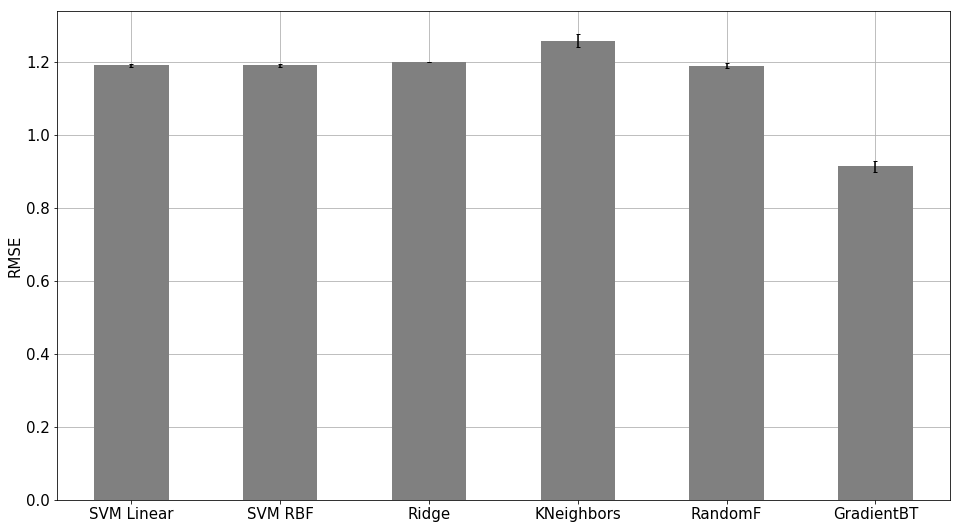

In [53]:
plt.rcParams['font.size'] = 15
ax = all_scores_mean.RMSE.plot(yerr=all_scores_std.STD, capsize=2, legend=False, grid=True,color ='grey', kind='bar', figsize= (16,9))
for label in ax.get_xticklabels():
    label.set_rotation(0)

ax.grid(zorder=0)
ax.set_axisbelow(True)
ax.set_ylabel('RMSE')
plt.show()